In [1]:
from _tests import scripts
from scripts.notebook_utils import *

spec = get_spec('sinangil_jssc_2021')._process()

variables = spec.variables

# Number of parallel inputs and outputs
array_parallel_inputs = spec.variables["ARRAY_PARALLEL_INPUTS"]
array_parallel_outputs = spec.variables["ARRAY_PARALLEL_OUTPUTS"]
input_encoding_func = spec.variables["INPUT_ENCODING_FUNC"]
weight_encoding_func = spec.variables["WEIGHT_ENCODING_FUNC"]
encoded_input_bits = spec.variables["ENCODED_INPUT_BITS"]
encoded_weight_bits = spec.variables["ENCODED_WEIGHT_BITS"]
encoded_output_bits = spec.variables["ENCODED_OUTPUT_BITS"]
cim_unit_width_cells = spec.variables["CIM_UNIT_WIDTH_CELLS"]
cim_unit_depth_cells = spec.variables["CIM_UNIT_DEPTH_CELLS"]
bits_per_cell = spec.variables["BITS_PER_CELL"]
adc_resolution = spec.variables["ADC_RESOLUTION"]
dac_resolution = spec.variables["DAC_RESOLUTION"]

signed_sum_across_inputs = spec.variables["SIGNED_SUM_ACROSS_INPUTS"]
signed_sum_across_weights = spec.variables["SIGNED_SUM_ACROSS_WEIGHTS"]

input_encoding_func = spec.variables["INPUT_ENCODING_FUNC"].__name__
weight_encoding_func = spec.variables["WEIGHT_ENCODING_FUNC"].__name__

if input_encoding_func in ['offset_encode_hist', 'offset_encode_if_signed_hist']:
    input_encoding = "Signed inputs receive a bias to make all of them positive."

elif input_encoding_func in [
    'magnitude_encode_hist',
    'two_part_magnitude_encode_hist',
    'magnitude_encode_if_signed_hist',
    'two_part_magnitude_encode_if_signed_hist',
]:
    input_encoding = "Signed inputs are encoded using signed hardware."
    if spec.variables["SIGNED_SUM_ACROSS_INPUTS"]:
        input_encoding += " Inputs are summed in the analog domain."
    else:
        input_encoding += " Inputs are summed in the digital domain."
else:
    raise ValueError(f"Unexpected input encoding function: {input_encoding_func}")
print(input_encoding)

Signed inputs are encoded using signed hardware. Inputs are summed in the digital domain.


In [2]:
spec = get_spec('sinangil_jssc_2021', system="ws_dummy_buffer_many_macro")
spec.problem.instance['M'] = 1024
spec.problem.instance['C'] = 1024


# These histograms symmetric and zero-centered (the centermost bin is the
# probability of zero). Histograms are normalized to sum to 1.0 and they have
# 2^N-1 bins for some integer N. Higher N yields higher-fidelity histograms,
# but also increases runtime & the size of YAML files. Encoding functions will
# upsample or downsample histograms depending on the bitwidth of the
# corresponding operands.

# Recommended to use 15 bins.
spec.variables["INPUTS_HIST"] = [1, 2, 3, 4, 3, 2, 1]
spec.variables["WEIGHTS_HIST"] = [1, 2, 3, 4, 3, 2, 1]
spec.variables["OUTPUTS_HIST"] = [1, 2, 3, 4, 3, 2, 1]

result = run_mapper(spec)

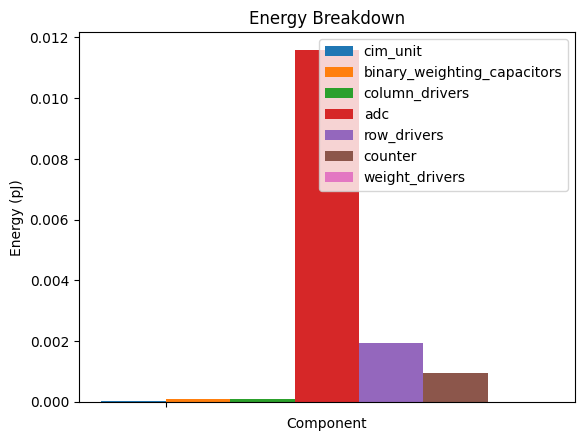

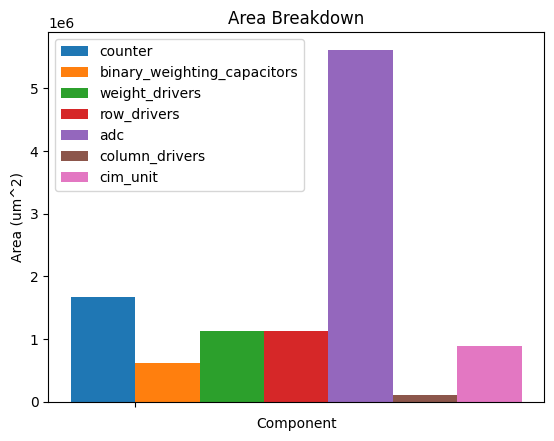

In [3]:
result.clear_zero_energies()
result.clear_zero_areas()
bar_side_by_side(
    {"": result.per_compute("per_component_energy")*1e12},
    xlabel="Component",
    ylabel="Energy (pJ)",
    title="Energy Breakdown",
)
bar_side_by_side(
    {"": result.per_component_area*1e12},
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)